In [2]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages

In [28]:
class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: str
    supporter: str
    opponent: str
    judgment: str

In [10]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [29]:
from langchain_groq import ChatGroq
from langchain.chat_models import init_chat_model

llm = ChatGroq(model="llama-3.1-8b-instant")

In [30]:
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x000001B9157C4110>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x000001B914DF7750>, model_name='llama-3.1-8b-instant', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [31]:
## Node Functionality
def chatbot(state:State):
    return {"messages":[llm.invoke(state["messages"])]}

In [35]:
graph_builder=StateGraph(State)
def supporter_node(state: State):
    return {
        "supporter": llm.invoke(f"Argue in favor of: {state['messages']}")
    }

def opponent_node(state: State):
    return {
        "opponent": llm.invoke(f"Argue against: {state['messages']}")
    }

def judge_node(state: State):
    return {
        "judgment": llm.invoke(
            f"Summarize the debate.\n\n"
            f"Supporter said: {state.get('supporter','')}\n"
            f"Opponent said: {state.get('opponent','')}"
        )
    }

graph_builder.add_node("supporter", supporter_node)
graph_builder.add_node("opponent", opponent_node)
graph_builder.add_node("judge", judge_node)
## Adding Edges
graph_builder.add_edge(START,"supporter")
graph_builder.add_edge(START,"opponent")
graph_builder.add_edge("supporter","judge")
graph_builder.add_edge("opponent","judge")
graph_builder.add_edge("judge",END)

## compile the graph
graph=graph_builder.compile()

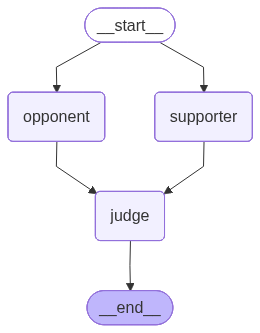

In [36]:
## Visualize the graph
from IPython.display import Image,display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [37]:
response=graph.invoke({"messages":"debate on use of mobile phones"})

In [41]:
import textwrap

def pretty_print(role, message):
    print(f"\n=== {role} ===")
    print(textwrap.fill(message.content, width=80))

pretty_print("Supporter", response["supporter"])



=== Supporter ===
The debate on the use of mobile phones has been a longstanding topic of
discussion, with proponents on both sides presenting valid arguments. Here's a
case in favor of debating the use of mobile phones:  **Positive impacts of
mobile phones:**  1. **Access to information**: Mobile phones have made
information more accessible than ever before. With the internet at our
fingertips, we can instantly access a vast amount of knowledge, news, and
educational resources. 2. **Improved communication**: Mobile phones have
revolutionized the way we communicate, enabling us to stay connected with
family, friends, and colleagues across geographical distances. 3.
**Convenience**: Mobile phones have made our lives more convenient, allowing us
to manage our schedules, pay bills, and access various services on-the-go. 4.
**Economic benefits**: Mobile phones have created new economic opportunities,
enabling entrepreneurs to start businesses, connect with customers, and access
new market

In [42]:
pretty_print("Opponent", response["opponent"])



=== Opponent ===
**The Dark Side of Mobile Phones: Why We Need to Rethink Our Addiction**  The
debate on the use of mobile phones has been a contentious issue for years, with
proponents arguing that it has revolutionized the way we communicate and access
information. However, as we delve deeper into the consequences of mobile phone
addiction, it becomes clear that the negatives far outweigh the benefits. Here
are some compelling arguments against the excessive use of mobile phones:  **1.
Mental Health Concerns**  Mobile phone addiction has been linked to a range of
mental health issues, including anxiety, depression, and loneliness. The
constant stream of notifications, social media updates, and news can create a
sense of FOMO (fear of missing out) and lead to feelings of inadequacy and low
self-esteem. Furthermore, the blue light emitted by mobile phones can interfere
with our sleep patterns, leading to fatigue, irritability, and decreased
concentration.  **2. Social Isolation**  Whi

In [43]:
pretty_print("Judge", response["judgment"])


=== Judge ===
The debate revolves around the use of mobile phones and their effects on
individuals and society. Two opposing views are presented:  **Supporter's
View:**  * Mobile phones have numerous benefits, including:         + Access to
information and educational resources         + Improved communication and
connectivity         + Convenience and economic benefits         + Social
benefits, such as bridging social divides * Debating mobile phone use promotes
awareness, education, and informed decision-making * Key areas for debate
include:         + Addiction and mental health concerns         + Cybersecurity
and data protection         + Social isolation and loneliness         +
Environmental impact         + Regulation and governance  **Opponent's View:**
* Mobile phone addiction has numerous negative consequences, including:
+ Mental health concerns, such as anxiety, depression, and loneliness         +
Social isolation and decreased face-to-face communication skills         